### 한국예탁결제원_주식정보서비스

- 신규예탁지정종목조회


In [1]:
# 공공 데이터 포털 요청 관련
import requests
import xml.etree.ElementTree as et
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote

# 시각화
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from matplotlib import rcParams
from matplotlib import font_manager, rc
import matplotlib.dates as mdates
import seaborn as sns

# 기본 module
import pandas as pd
import numpy as np
import pprint
from os import name
from tqdm import tqdm

###한글 폰트###
rcParams['axes.unicode_minus'] = False
#plt.rcParams['font.family'] = 'Malgun Gothic'

font_name = font_manager.FontProperties(fname="/Users/gominseong/Library/Fonts/MaruBuri-Regular.otf").get_name()
rc('font', family=font_name)

encoding = ''
decoding = ''
url = 'http://api.seibro.or.kr/openapi/service/StockSvc/getNewDepoSecnListN1'


In [3]:
date_small_lst = ['20'+str(y)+str(x) for x in range(1,13) for y in range(18,23)]
date_lst = [x[:4]+'0'+x[-1]  if len(x)==5 else x for x in date_small_lst]
date_lst.sort()

df = pd.DataFrame()
for date in tqdm(date_lst):
    params ={'serviceKey' : decoding, 
        'yyyymm': date,
        'numOfRows':999
        #'stdDt':20171130
        }
    response = requests.get(url, params=params)
    content = response.text
    #print(response.text)
    # 깔끔한 출력 위한 코드
    pp = pprint.PrettyPrinter(indent=4)
    #print(pp.pprint(content))

    #bs4 사용하여 item 태그 분리

    xml_obj = bs4.BeautifulSoup(content,'lxml-xml')
    rows = xml_obj.findAll('item')
    #print(rows)
    # 각 행의 컬럼, 이름, 값을 가지는 리스트 만들기
    row_list = [] # 행값
    name_list = [] # 열이름값
    value_list = [] #데이터값

    # xml 안의 데이터 수집
    for i in range(0, len(rows)):
        columns = rows[i].find_all()
        #첫째 행 데이터 수집
        for j in range(0,len(columns)):
            if i ==0:
                # 컬럼 이름 값 저장
                name_list.append(columns[j].name)
            # 컬럼의 각 데이터 값 저장
            value_list.append(columns[j].text)
        # 각 행의 value값 전체 저장
        row_list.append(value_list)
        # 데이터 리스트 값 초기화
        value_list=[]
        
    
    #xml값 DataFrame으로 만들기
    df1 = pd.DataFrame(row_list, columns=name_list)
    df = pd.concat([df, df1], axis=0)
    print(df.shape)

  2%|▋                                           | 1/60 [00:02<02:09,  2.19s/it]

(75, 12)


  3%|█▍                                          | 2/60 [00:04<01:59,  2.06s/it]

(108, 12)


  5%|██▏                                         | 3/60 [00:06<01:59,  2.10s/it]

(176, 12)


  7%|██▉                                         | 4/60 [00:08<01:56,  2.09s/it]

(235, 12)


  8%|███▋                                        | 5/60 [00:11<02:08,  2.33s/it]

(321, 12)


 10%|████▍                                       | 6/60 [00:13<02:10,  2.41s/it]

(428, 12)


 12%|█████▏                                      | 7/60 [00:15<02:03,  2.33s/it]

(525, 12)


 13%|█████▊                                      | 8/60 [00:17<01:57,  2.26s/it]

(592, 12)


 15%|██████▌                                     | 9/60 [00:20<01:56,  2.29s/it]

(636, 12)


 17%|███████▏                                   | 10/60 [00:22<01:51,  2.23s/it]

(694, 12)


 18%|███████▉                                   | 11/60 [00:24<01:48,  2.21s/it]

(807, 12)


 20%|████████▌                                  | 12/60 [00:26<01:45,  2.19s/it]

(882, 12)


 22%|█████████▎                                 | 13/60 [00:29<01:50,  2.35s/it]

(936, 12)


 23%|██████████                                 | 14/60 [00:32<01:51,  2.42s/it]

(987, 12)


 25%|██████████▊                                | 15/60 [00:34<01:47,  2.40s/it]

(1052, 12)


 27%|███████████▍                               | 16/60 [00:36<01:43,  2.35s/it]

(1143, 12)


 28%|████████████▏                              | 17/60 [00:38<01:37,  2.27s/it]

(1217, 12)


 30%|████████████▉                              | 18/60 [00:41<01:37,  2.31s/it]

(1312, 12)


 32%|█████████████▌                             | 19/60 [00:43<01:38,  2.40s/it]

(1385, 12)


 33%|██████████████▎                            | 20/60 [00:45<01:31,  2.29s/it]

(1448, 12)


 35%|███████████████                            | 21/60 [00:47<01:28,  2.27s/it]

(1501, 12)


 37%|███████████████▊                           | 22/60 [00:50<01:23,  2.21s/it]

(1567, 12)


 38%|████████████████▍                          | 23/60 [00:52<01:20,  2.17s/it]

(1649, 12)


 40%|█████████████████▏                         | 24/60 [00:54<01:15,  2.10s/it]

(1714, 12)


 42%|█████████████████▉                         | 25/60 [00:55<01:11,  2.05s/it]

(1772, 12)


 43%|██████████████████▋                        | 26/60 [00:58<01:10,  2.07s/it]

(1855, 12)


 45%|███████████████████▎                       | 27/60 [01:00<01:08,  2.08s/it]

(1916, 12)


 47%|████████████████████                       | 28/60 [01:01<01:03,  1.99s/it]

(1964, 12)


 48%|████████████████████▊                      | 29/60 [01:03<00:59,  1.93s/it]

(2042, 12)


 50%|█████████████████████▌                     | 30/60 [01:05<00:57,  1.91s/it]

(2112, 12)


 52%|██████████████████████▏                    | 31/60 [01:07<00:56,  1.93s/it]

(2160, 12)


 53%|██████████████████████▉                    | 32/60 [01:09<00:54,  1.96s/it]

(2218, 12)


 55%|███████████████████████▋                   | 33/60 [01:11<00:51,  1.91s/it]

(2269, 12)


 57%|████████████████████████▎                  | 34/60 [01:13<00:49,  1.89s/it]

(2330, 12)


 58%|█████████████████████████                  | 35/60 [01:15<00:46,  1.87s/it]

(2393, 12)


 60%|█████████████████████████▊                 | 36/60 [01:17<00:45,  1.90s/it]

(2467, 12)


 62%|██████████████████████████▌                | 37/60 [01:18<00:42,  1.87s/it]

(2526, 12)


 63%|███████████████████████████▏               | 38/60 [01:21<00:43,  1.99s/it]

(2577, 12)


 65%|███████████████████████████▉               | 39/60 [01:22<00:40,  1.92s/it]

(2652, 12)


 67%|████████████████████████████▋              | 40/60 [01:24<00:37,  1.90s/it]

(2736, 12)


 68%|█████████████████████████████▍             | 41/60 [01:26<00:37,  1.98s/it]

(2811, 12)


 70%|██████████████████████████████             | 42/60 [01:28<00:35,  1.95s/it]

(2904, 12)


 72%|██████████████████████████████▊            | 43/60 [01:31<00:35,  2.07s/it]

(2958, 12)


 73%|███████████████████████████████▌           | 44/60 [01:33<00:33,  2.08s/it]

(3022, 12)


 75%|████████████████████████████████▎          | 45/60 [01:35<00:29,  1.99s/it]

(3071, 12)


 77%|████████████████████████████████▉          | 46/60 [01:37<00:28,  2.03s/it]

(3174, 12)


 78%|█████████████████████████████████▋         | 47/60 [01:39<00:26,  2.04s/it]

(3251, 12)


 80%|██████████████████████████████████▍        | 48/60 [01:41<00:24,  2.01s/it]

(3337, 12)


 82%|███████████████████████████████████        | 49/60 [01:42<00:21,  1.91s/it]

(3380, 12)


 83%|███████████████████████████████████▊       | 50/60 [01:44<00:19,  1.92s/it]

(3450, 12)


 85%|████████████████████████████████████▌      | 51/60 [01:47<00:18,  2.02s/it]

(3515, 12)


 87%|█████████████████████████████████████▎     | 52/60 [01:48<00:15,  1.95s/it]

(3580, 12)


 88%|█████████████████████████████████████▉     | 53/60 [01:50<00:13,  1.94s/it]

(3623, 12)


 90%|██████████████████████████████████████▋    | 54/60 [01:52<00:11,  1.92s/it]

(3695, 12)


 92%|███████████████████████████████████████▍   | 55/60 [01:54<00:09,  1.87s/it]

(3763, 12)


 93%|████████████████████████████████████████▏  | 56/60 [01:57<00:08,  2.15s/it]

(3790, 12)


 95%|████████████████████████████████████████▊  | 57/60 [01:59<00:06,  2.07s/it]

(3824, 12)


 97%|█████████████████████████████████████████▌ | 58/60 [02:01<00:04,  2.03s/it]

(3880, 12)


 98%|██████████████████████████████████████████▎| 59/60 [02:02<00:01,  1.98s/it]

(3966, 12)


100%|███████████████████████████████████████████| 60/60 [02:04<00:00,  2.08s/it]

(4037, 12)


In [4]:
df.columns

Index(['apliDt', 'eltscYn', 'indtpClsfNo', 'indtpNm', 'isin', 'issucoCustno',
       'korSecnNm', 'pval', 'secnKacd', 'secnKacdNm', 'setaccMm',
       'totIssuQty'],
      dtype='object')

In [5]:
df.head()

,apliDt,eltscYn,indtpClsfNo,indtpNm,isin,issucoCustno,korSecnNm,pval,secnKacd,secnKacdNm,setaccMm,totIssuQty
0,20180130,N,J58222,정보통신업,KR7286660006,31945,가브린트,100,0101,보통주,12,3710000
1,20180130,Y,C303,제조업,KR7290120005,32206,대유에이피,500,0101,보통주,12,11859281
2,20180130,N,J58222,정보통신업,KR7285640009,31710,블루앤,10000,0101,보통주,12,20000
3,20180130,N,C26299,제조업,KR7287060008,31888,비앤알테크널러지,5000,0101,보통주,12,20200
4,20180130,N,G47212,도매 및 소매업,KR727508K011,30627,아이언가이즈1우,500,0201,우선주,12,19558


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 70
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   apliDt        4037 non-null   object
 1   eltscYn       4037 non-null   object
 2   indtpClsfNo   4037 non-null   object
 3   indtpNm       4037 non-null   object
 4   isin          4037 non-null   object
 5   issucoCustno  4037 non-null   object
 6   korSecnNm     4037 non-null   object
 7   pval          4037 non-null   object
 8   secnKacd      4037 non-null   object
 9   secnKacdNm    4037 non-null   object
 10  setaccMm      4037 non-null   object
 11  totIssuQty    4037 non-null   object
dtypes: object(12)
memory usage: 410.0+ KB


In [7]:
# pval = 액면가
# totIssuQty = 총 발행 수

df["pval"] = df["pval"].astype("int")
df["totIssuQty"] = df["totIssuQty"].astype("int")
df["총 발행 주식 금액"] = df["totIssuQty"] * df["pval"]  

In [8]:
print("액면가 평균값 :",df["pval"].mean())
print("액면가 중간값 :",df["pval"].median())
print("액면가 표준편차 :",df["pval"].std())
print("액면가 최대값 :",df["pval"].max())
print("액면가 최소값 :",df["pval"].min())

액면가 평균값 : 10967.773098835769
액면가 중간값 : 500.0
액면가 표준편차 : 551333.7358036496
액면가 최대값 : 35000000
액면가 최소값 : 0


In [9]:
print("총 발행 주식 금액 평균값 :",df["총 발행 주식 금액"].mean())
print("총 발행 주식 금액 중간값 :",df["총 발행 주식 금액"].median())
print("총 발행 주식 금액 표준편차 :",df["총 발행 주식 금액"].std())
print("총 발행 주식 금액 최대값 :",df["총 발행 주식 금액"].max())
print("총 발행 주식 금액 최소값 :",df["총 발행 주식 금액"].min())

총 발행 주식 금액 평균값 : 4166494142.333416
총 발행 주식 금액 중간값 : 132013500.0
총 발행 주식 금액 표준편차 : 73169728294.12752
총 발행 주식 금액 최대값 : 3640302745000
총 발행 주식 금액 최소값 : 0


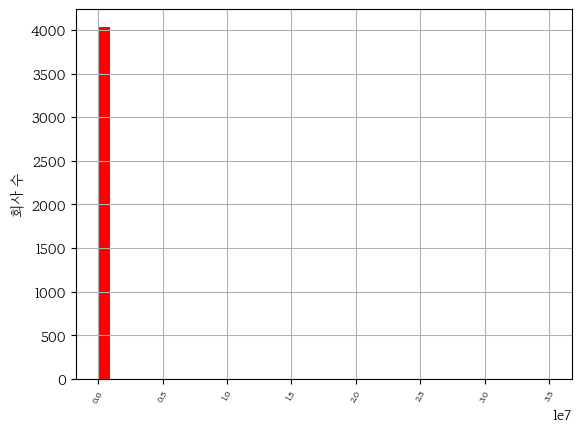

In [11]:
plt.hist(df['pval'], bins=40, color='red') #bins 구간갯수
plt.ylabel('회사 수')
plt.grid()
plt.xticks(rotation=60, fontsize=6)
plt.show()

In [12]:
df["M"] = df["apliDt"].apply(lambda x: x[:6])

In [13]:
Q1 = df['pval'].quantile(0.25)
Q3 = df['pval'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

median = df['pval'].median()
df['pval'] = np.where((df['pval'] < lower) , lower, df['pval'])
df['pval'] = np.where((df['pval'] > upper) , upper, df['pval'])

In [14]:
df['pval'].max()

11750.0

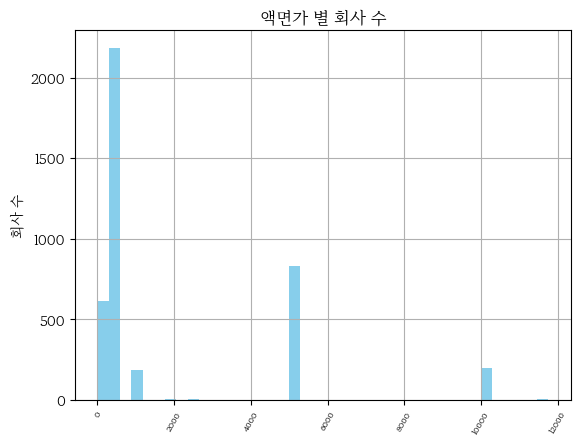

In [17]:
plt.hist(df['pval'], bins=40, color='skyblue') #bins 구간갯수
plt.ylabel('회사 수')
plt.title('액면가 별 회사 수')
plt.grid()
plt.xticks(rotation=60, fontsize=6)
plt.show()

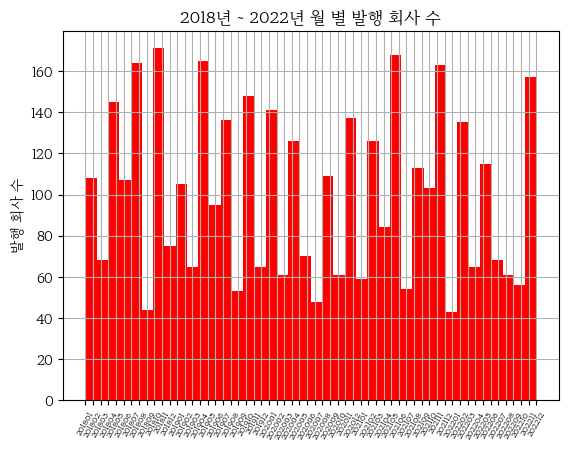

In [18]:
plt.hist(df['M'], bins=40, color='red') #bins 구간갯수
plt.ylabel('발행 회사 수')
plt.grid()
plt.title("2018년 ~ 2022년 월 별 발행 회사 수")
plt.xticks(rotation=60, fontsize=6)
plt.show()

In [19]:
df["year"] = df["apliDt"].apply(lambda x: x[:4])

In [20]:
df.query('year=="2018"')['year']

0     2018
1     2018
2     2018
3     2018
4     2018
      ... 
70    2018
71    2018
72    2018
73    2018
74    2018
Name: year, Length: 882, dtype: object

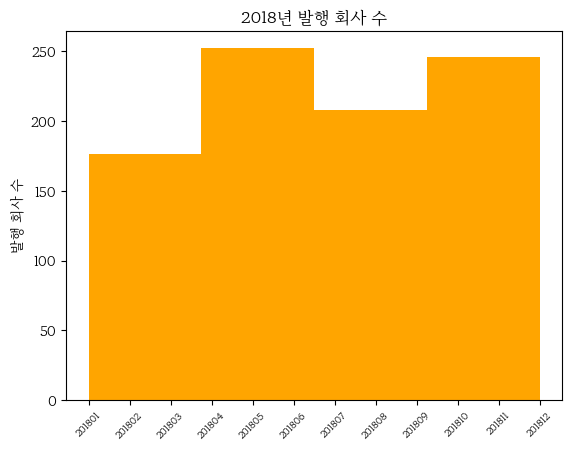

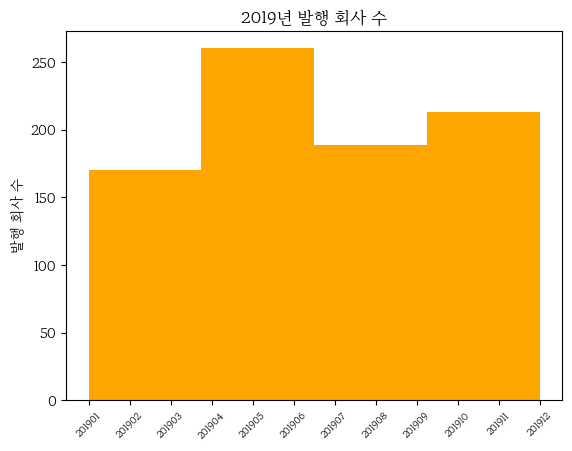

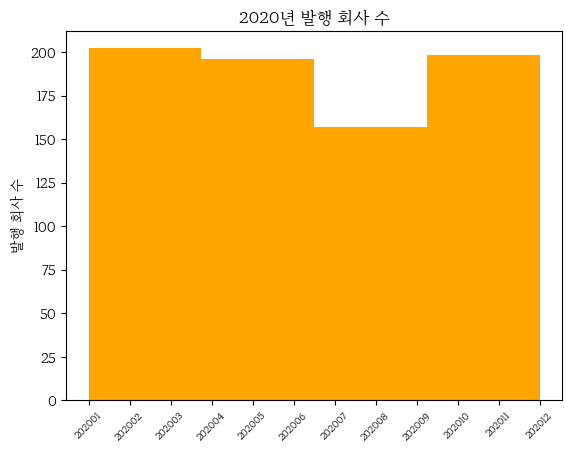

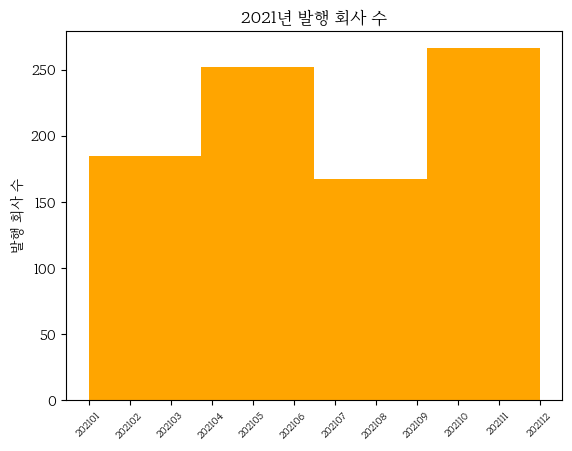

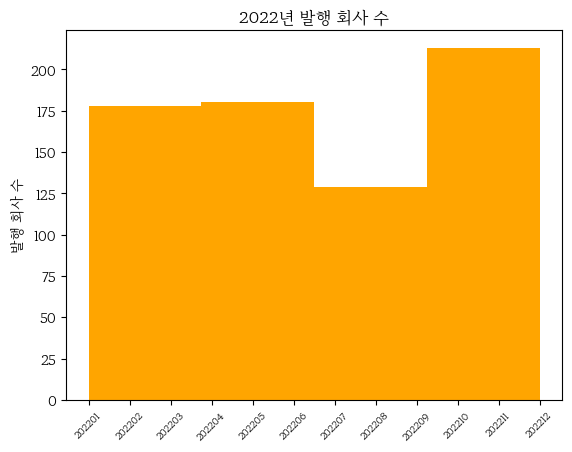

In [21]:
for i in range(2018,2023):
    i=str(i)
    plt.hist(df.query('year==@i')['M'], bins=4, color='orange') #bins 구간갯수
    plt.ylabel('발행 회사 수')
    plt.xticks( fontsize=7, rotation=45)
    plt.title(str(i)+"년 발행 회사 수")
    plt.show()

In [22]:
df

,apliDt,eltscYn,indtpClsfNo,indtpNm,isin,issucoCustno,korSecnNm,pval,secnKacd,secnKacdNm,setaccMm,totIssuQty,총 발행 주식 금액,M,year
0,20180130,N,J58222,정보통신업,KR7286660006,31945,가브린트,100.0,0101,보통주,12,3710000,371000000,201801,2018
1,20180130,Y,C303,제조업,KR7290120005,32206,대유에이피,500.0,0101,보통주,12,11859281,5929640500,201801,2018
2,20180130,N,J58222,정보통신업,KR7285640009,31710,블루앤,10000.0,0101,보통주,12,20000,200000000,201801,2018
3,20180130,N,C26299,제조업,KR7287060008,31888,비앤알테크널러지,5000.0,0101,보통주,12,20200,101000000,201801,2018
4,20180130,N,G47212,도매 및 소매업,KR727508K011,30627,아이언가이즈1우,500.0,0201,우선주,12,19558,9779000,201801,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,20221202,Y,K661,금융 및 보험업,KR7450050000,48174,하이제8호기업인수목적,100.0,0101,보통주,12,764000,76400000,202212,2022
67,20221201,N,G,도매 및 소매업,KR725090K012,28234,메디포럼1우,500.0,0201,우선주,12,2369230,1184615000,202212,2022
68,20221201,N,C33999,제조업,KR7443630009,47808,벨락,5000.0,0101,보통주,12,28629,143145000,202212,2022
69,20221201,N,C33999,제조업,KR744363K010,47808,벨락1우,5000.0,0201,우선주,12,566,2830000,202212,2022


In [27]:
df["M"] = pd.to_datetime(df["M"], format = '%Y%m')

In [28]:
sns.color_palette("hls", 5) # hls 색상표에서 8개의 색상을 가져옴

[(0.86, 0.3712, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86)]

In [29]:
df = df.reset_index()

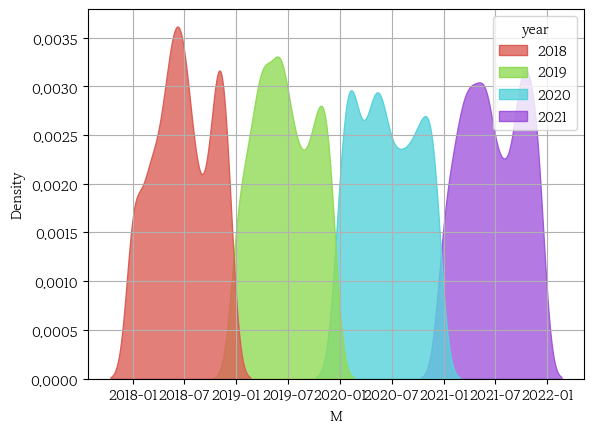

In [30]:
sns.kdeplot(data = df.query('year!="2022"'), x ='M', hue='year', fill=True, common_norm=False, palette="hls",
   alpha=.8)
plt.grid()
plt.show()

In [31]:
df["Month"]=df["apliDt"].apply(lambda x: x[4:6])

In [32]:
df["Month"]= df["Month"].astype('int')

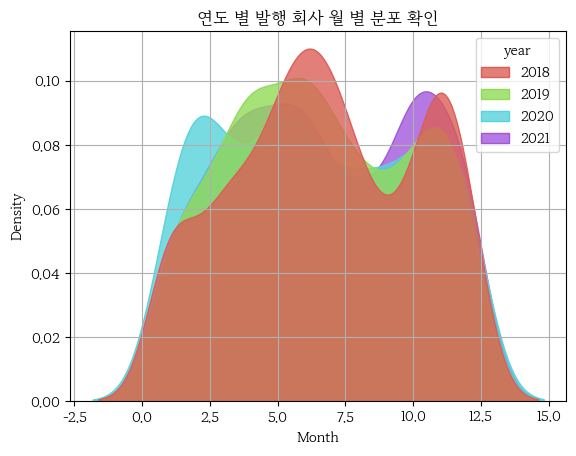

In [35]:
sns.kdeplot(data = df.query('year!="2022"'), x ='Month', hue='year', fill=True, common_norm=False, palette="hls",
   alpha=.8)
plt.title("연도 별 발행 회사 월 별 분포 확인")
plt.grid()
plt.show()
#-> 모든 연도에서 유사한 분포를 보임, 발행을 많이 하는 기간이 존재(봄)  (다만, 2020년에는 분포가 약간 다름 : 코로나)